In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [112]:
# Load the dataset
data = pd.read_csv('no_commas_location.csv')
data.sample(10)

,Unnamed: 0,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
8574,8574,ff80818163c529be0163c5f65582255c,BHK2,New Tippasandra,2018-04-06 18:44:00,12.971352,77.656944,FAMILY,0.0,1.0,...,0,1,1,0,0,1,0,0,0,0
9037,9037,ff808181629acf750162a473e6404467,BHK3,Vijaya Nagar,2018-09-04 16:14:00,12.962614,77.540636,FAMILY,0.0,0.0,...,0,1,1,0,1,0,0,0,0,0
658,658,ff8081815e233dd2015e2c6717cb3f98,BHK2,Whitefield,2018-05-24 19:42:00,12.966168,77.724777,ANYONE,1.0,1.0,...,0,1,1,1,1,1,1,1,1,1
14317,14317,ff808181507c3c0501507f8079b8147b,BHK2,Vijayanagar,2018-07-31 17:11:00,12.965612,77.532669,FAMILY,0.0,0.0,...,0,0,1,0,1,0,0,0,0,1
13779,13779,ff8081815df00c39015df39e7da51bbe,BHK1,Munnekollal,2018-07-20 15:24:00,12.944681,77.708031,FAMILY,0.0,0.0,...,0,1,0,1,0,0,0,0,0,1
19409,19409,ff808181629acf750162a474693544b6,BHK2,Muneshwara Nagar,2018-04-21 18:26:00,12.900732,77.646260,FAMILY,1.0,1.0,...,0,1,0,0,1,0,0,1,1,0
10062,10062,ff80818151b924d00151bdb44af12c4f,BHK1,Mahaganapathi Nagar,2018-02-07 16:08:00,12.987614,77.550075,ANYONE,0.0,0.0,...,0,0,1,0,1,0,0,0,0,0
10423,10423,ff8081816108a1fb01611c245e6c2429,BHK1,Domlur,2018-01-27 11:31:00,12.961380,77.634631,ANYONE,0.0,0.0,...,0,1,1,0,1,0,0,0,0,0
9331,9331,ff808181615a62ea01615ae798a54079,BHK1,Malleshpalya,2018-03-02 14:59:00,12.975863,77.673506,ANYONE,0.0,0.0,...,0,0,1,0,1,0,0,0,0,0
10275,10275,ff8081815da6ce90015da6f388fa05cf,BHK2,Richmond Town,2017-03-08 13:24:00,12.965444,77.605917,ANYONE,0.0,0.0,...,0,0,1,0,1,0,0,0,0,0


In [113]:

# Group by 'locality' and count occurrences
locality_counts = data.groupby('locality').size()

# Create a boolean mask to filter rows with repeating unique values
repeating_unique_mask = data['locality'].map(locality_counts) > 10

# Filter the DataFrame to keep only rows wit
data = data[repeating_unique_mask]

In [114]:
data['locality'].value_counts()

Whitefield              1502
HSR Layout               797
Banashankari             746
Bellandur                619
Marathahalli             527
                        ... 
BTM Layout 1st Stage      11
Tavarekere                11
Kodipur                   11
Sampangi Rama Nagar       11
Jagadish Nagar            11
Name: locality, Length: 198, dtype: int64

In [115]:
len(data['locality'].unique())

198

In [116]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Unnamed: 0,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,0,12.934471,77.634471,1.0,1.0,1.0,0.0,1250.0,25.0,2.0,...,0,1,1,1,0,1,1,0,1,1
1,1,12.929557,77.672280,0.0,1.0,0.0,1.0,1400.0,4.0,2.0,...,0,1,1,0,1,1,1,0,1,1
3,3,12.955991,77.531634,0.0,0.0,0.0,1.0,600.0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,4,12.963903,77.649446,0.0,0.0,0.0,1.0,1500.0,15.0,3.0,...,0,0,0,0,1,0,0,0,0,1
5,5,12.986196,77.718314,1.0,1.0,1.0,1.0,1080.0,0.0,2.0,...,0,1,0,0,0,0,0,0,1,0


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'gym'}>,
        <AxesSubplot:title={'center':'lift'}>,
        <AxesSubplot:title={'center':'swimming_pool'}>],
       [<AxesSubplot:title={'center':'negotiable'}>,
        <AxesSubplot:title={'center':'property_size'}>,
        <AxesSubplot:title={'center':'property_age'}>,
        <AxesSubplot:title={'center':'bathroom'}>,
        <AxesSubplot:title={'center':'cup_board'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'total_floor'}>,
        <AxesSubplot:title={'center':'balconies'}>,
        <AxesSubplot:title={'center':'rent'}>,
        <AxesSubplot:title={'center':'LIFT'}>,
        <AxesSubplot:title={'center':'GYM'}>,
        <AxesSubplot:title={'center':'INTERNET'}>],
       [<AxesSubplot:title={'center':'AC'}>,
        <AxesSubplot:title={'center

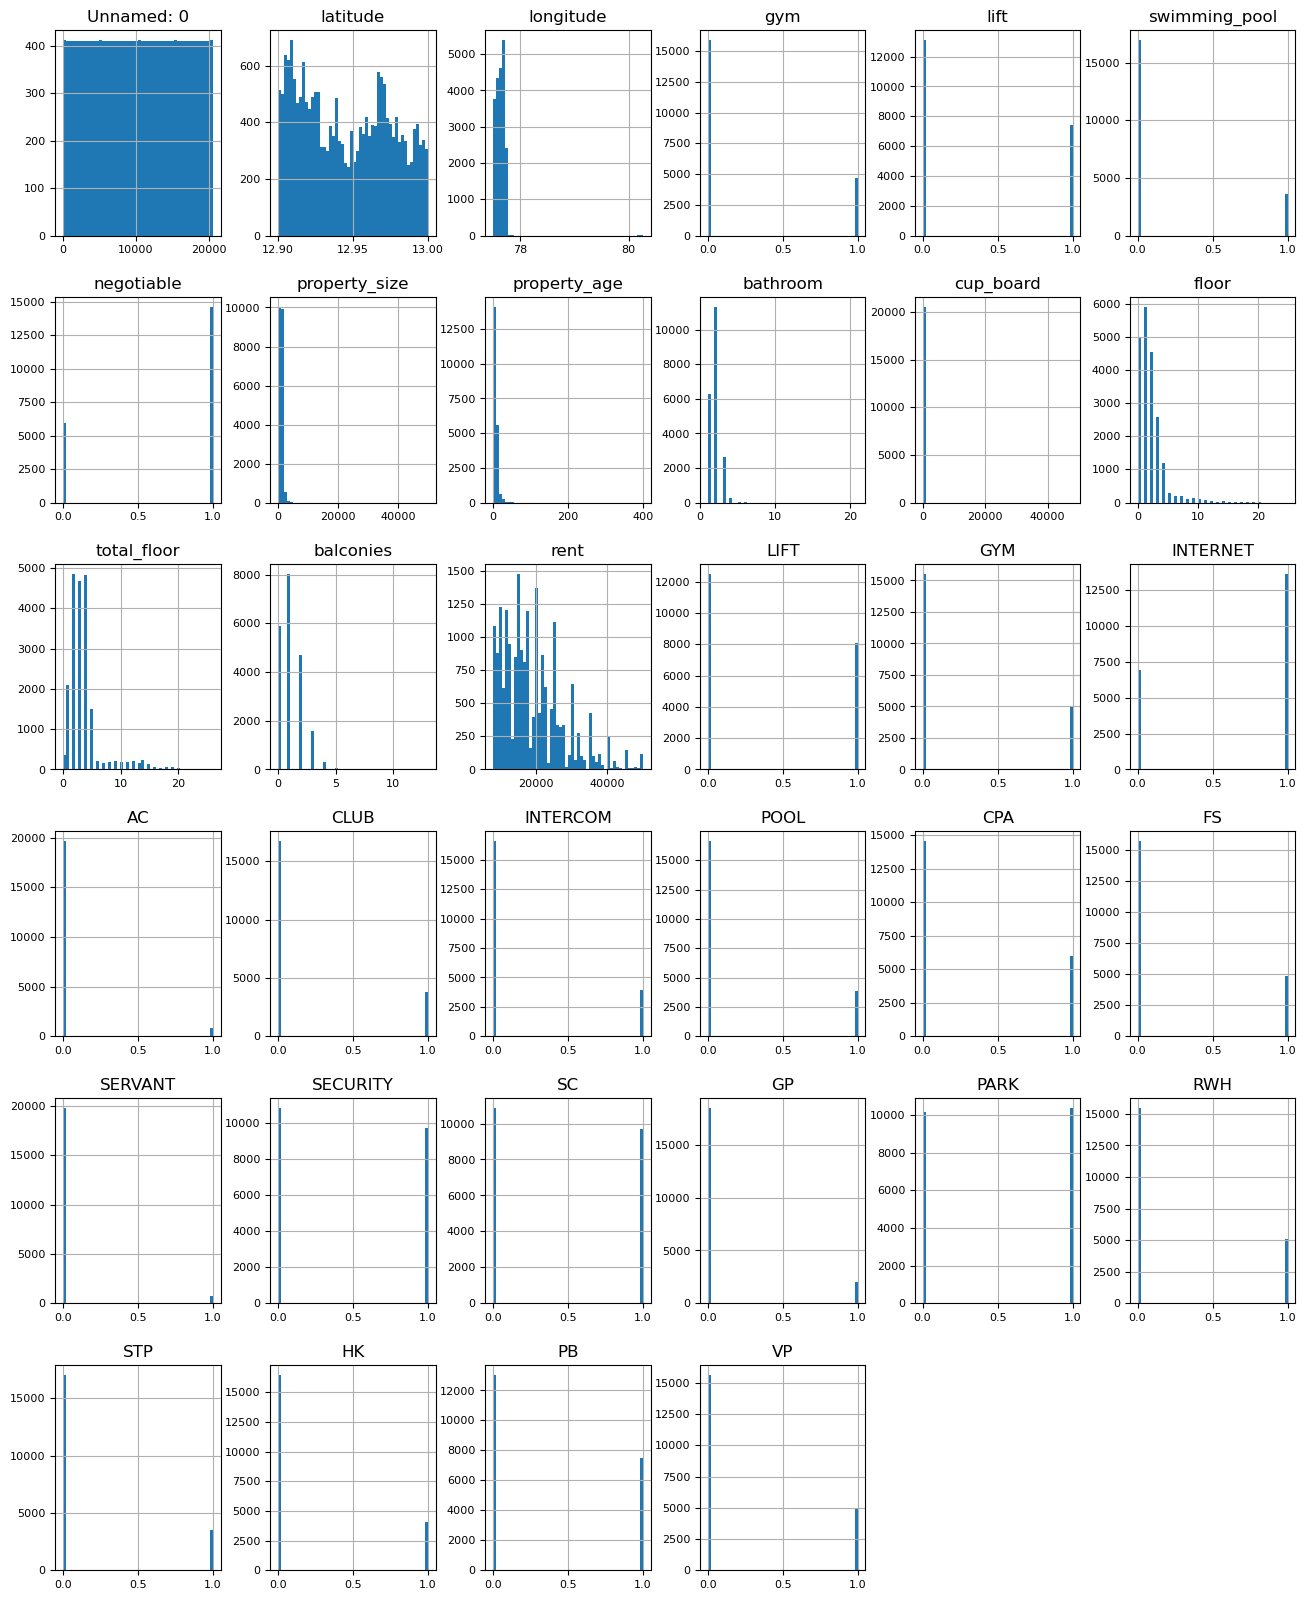

In [88]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18932 entries, 0 to 20554
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       18932 non-null  int64  
 1   id               18932 non-null  object 
 2   type             18932 non-null  object 
 3   locality         18932 non-null  object 
 4   activation_date  18932 non-null  object 
 5   latitude         18932 non-null  float64
 6   longitude        18932 non-null  float64
 7   lease_type       18932 non-null  object 
 8   gym              18932 non-null  float64
 9   lift             18932 non-null  float64
 10  swimming_pool    18932 non-null  float64
 11  negotiable       18932 non-null  float64
 12  furnishing       18932 non-null  object 
 13  parking          18932 non-null  object 
 14  property_size    18932 non-null  float64
 15  property_age     18932 non-null  float64
 16  bathroom         18932 non-null  float64
 17  facing      

In [126]:
#chaking NA values 
data['activation_date'] = pd.to_datetime(data['activation_date'])
nan_counts_per_column = data.isna().sum()
print(nan_counts_per_column)

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
water_supply       0
building_type      0
balconies          0
rent               0
LIFT               0
GYM                0
INTERNET           0
AC                 0
CLUB               0
INTERCOM           0
POOL               0
CPA                0
FS                 0
SERVANT            0
SECURITY           0
SC                 0
GP                 0
PARK               0
RWH                0
STP                0
HK                 0
PB                 0
VP                 0
dtype: int64


In [118]:
# NA values %
nan_percentage_per_column = (filtered_data.isna().sum() / len(filtered_data)) * 100
print(nan_percentage_per_column)

Unnamed: 0         0.0
id                 0.0
type               0.0
locality           0.0
activation_date    0.0
latitude           0.0
longitude          0.0
lease_type         0.0
gym                0.0
lift               0.0
swimming_pool      0.0
negotiable         0.0
furnishing         0.0
parking            0.0
property_size      0.0
property_age       0.0
bathroom           0.0
facing             0.0
cup_board          0.0
floor              0.0
total_floor        0.0
water_supply       0.0
building_type      0.0
balconies          0.0
rent               0.0
LIFT               0.0
GYM                0.0
INTERNET           0.0
AC                 0.0
CLUB               0.0
INTERCOM           0.0
POOL               0.0
CPA                0.0
FS                 0.0
SERVANT            0.0
SECURITY           0.0
SC                 0.0
GP                 0.0
PARK               0.0
RWH                0.0
STP                0.0
HK                 0.0
PB                 0.0
VP         

In [100]:
#Fill Na Values with mode and median
columns_cata = ['type', 'locality', 'activation_date', 'lease_type', 'furnishing', 'facing', 'amenities', 'water_supply', 'building_type','parking']

for col in columns_cata:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)
columns_int=set(data.columns) - set(columns_cata) - set(['id'])
for col in columns_int:
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)


KeyError: 'amenities'

In [10]:
# NA values %
nan_percentage_per_column = (data.isna().sum() / len(data)) * 100
print(nan_percentage_per_column)

id                 0.0
type               0.0
locality           0.0
activation_date    0.0
latitude           0.0
longitude          0.0
lease_type         0.0
gym                0.0
lift               0.0
swimming_pool      0.0
negotiable         0.0
furnishing         0.0
parking            0.0
property_size      0.0
property_age       0.0
bathroom           0.0
facing             0.0
cup_board          0.0
floor              0.0
total_floor        0.0
amenities          0.0
water_supply       0.0
building_type      0.0
balconies          0.0
rent               0.0
dtype: float64


In [11]:
#categorical variable
#Extract the amenities column and convert it from a JSON-like string to a dictionary
data['amenities'] = data['amenities'].apply(json.loads)
#Extract amenities and create new columns
amenities_list = ['LIFT', 'GYM', 'INTERNET', 'AC', 'CLUB', 'INTERCOM', 'POOL', 'CPA', 'FS', 'SERVANT', 'SECURITY', 'SC', 'GP', 'PARK', 'RWH', 'STP', 'HK', 'PB', 'VP']
for amenity in amenities_list:
    data[amenity] = data['amenities'].apply(lambda x: 1 if amenity in x and x[amenity] else 0)
#Drop the original 'amenities' column if no longer needed
data.drop('amenities', axis=1, inplace=True)

0        1
1        0
3        0
4        0
5        1
        ..
20550    0
20551    0
20552    0
20553    0
20554    0
Name: GYM, Length: 18932, dtype: int64

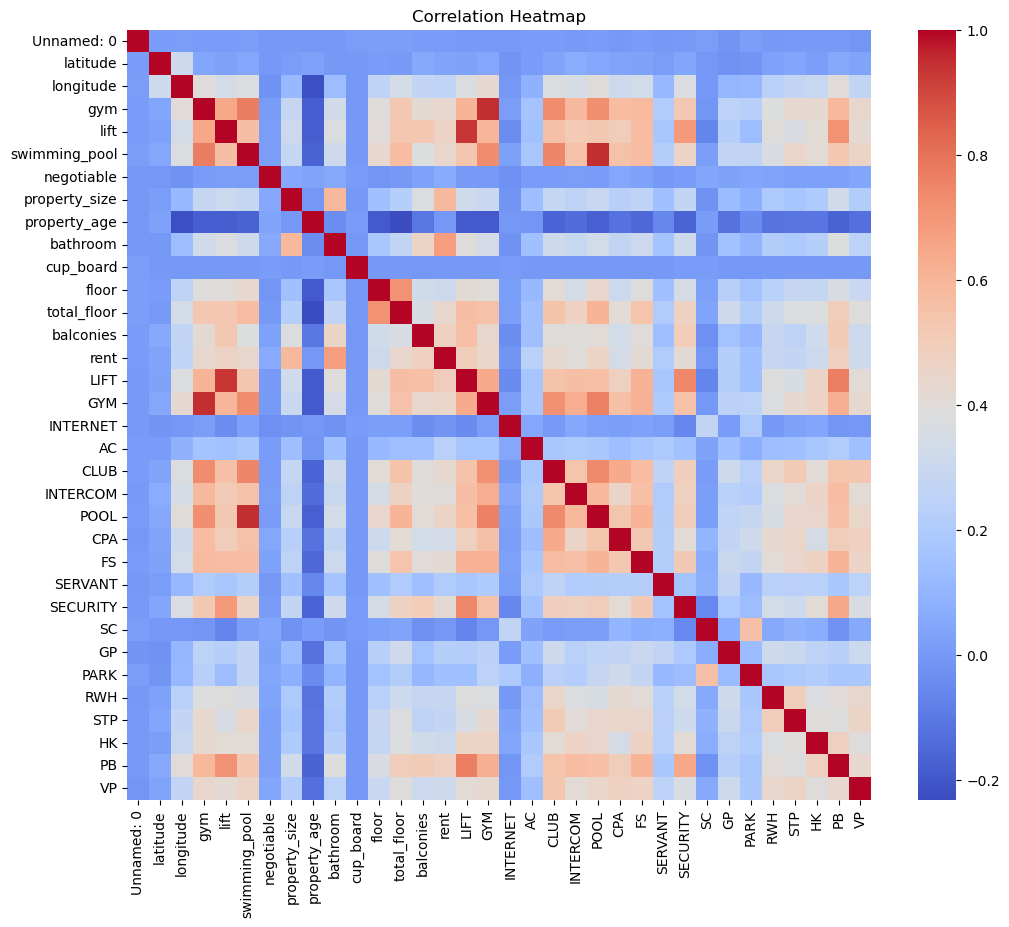

In [101]:
correlation_matrix = data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [102]:
# Extract correlations with the target variable
target_correlations = correlation_matrix['rent'].sort_values(ascending=False)

print("Correlation with the target variable:")
print(target_correlations)


Correlation with the target variable:
rent             1.000000
bathroom         0.679920
property_size    0.582598
LIFT             0.492946
PB               0.483563
balconies        0.476877
lift             0.463695
POOL             0.458775
GYM              0.451418
total_floor      0.440989
swimming_pool    0.438717
gym              0.433268
CLUB             0.431906
SECURITY         0.414413
FS               0.413169
INTERCOM         0.398068
CPA              0.342497
VP               0.318126
floor            0.310666
HK               0.310035
RWH              0.284758
STP              0.276824
longitude        0.263012
AC               0.233342
GP               0.223994
SERVANT          0.203332
PARK             0.145756
negotiable       0.058840
latitude         0.036180
Unnamed: 0       0.005357
cup_board       -0.001601
property_age    -0.009381
SC              -0.009401
INTERNET        -0.019503
Name: rent, dtype: float64


In [120]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [123]:
#drop when corr value < 0.1 with rent data set
columns_to_drop=['negotiable','cup_board','SC','property_age','INTERNET']
df=data.drop(columns=columns_to_drop)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18932 entries, 0 to 20554
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18932 non-null  object 
 1   type             18932 non-null  object 
 2   locality         18932 non-null  object 
 3   activation_date  18932 non-null  object 
 4   latitude         18932 non-null  float64
 5   longitude        18932 non-null  float64
 6   lease_type       18932 non-null  object 
 7   gym              18932 non-null  float64
 8   lift             18932 non-null  float64
 9   swimming_pool    18932 non-null  float64
 10  negotiable       18932 non-null  float64
 11  furnishing       18932 non-null  object 
 12  parking          18932 non-null  object 
 13  property_size    18932 non-null  float64
 14  property_age     18932 non-null  float64
 15  bathroom         18932 non-null  float64
 16  facing           18932 non-null  object 
 17  cup_board   

In [127]:
# calculate Age and drop the date time
current_date = datetime.today()
df['age_of_property'] = (current_date - df['activation_date']).dt.days // 365
df.drop(columns=['activation_date'],inplace=True)
df.columns

TypeError: unsupported operand type(s) for -: 'Timestamp' and 'str'

NameError: name 'age_of_property' is not defined

In [18]:
#drop high correlated value > 0.8
df.drop(columns=['lift','gym','swimming_pool'],inplace=True)

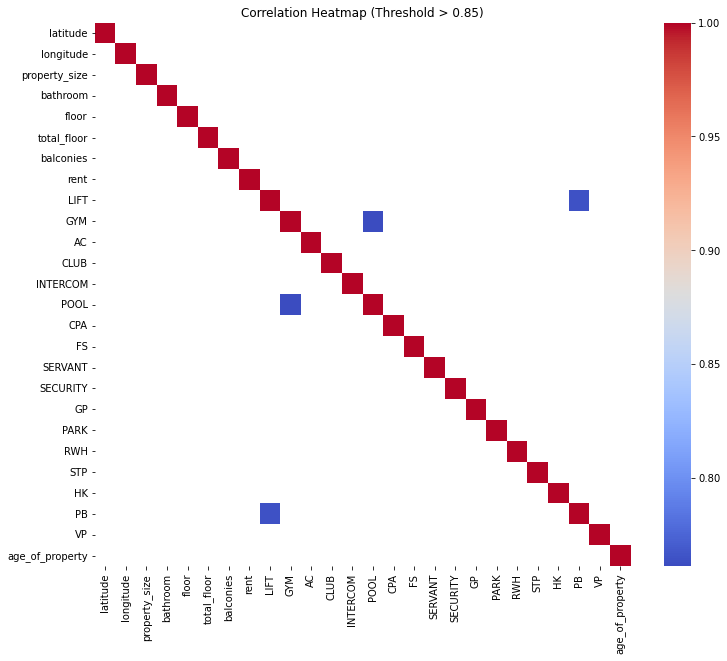

In [21]:
correlation_matrix = df.corr()
# Filter correlation values based on the threshold
threshold = 0.75
filtered_corr_matrix = correlation_matrix[abs(correlation_matrix) > threshold]

# Plot a heatmap of the filtered correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix, cmap='coolwarm')
plt.title("Correlation Heatmap (Threshold > 0.85)")
plt.show()

In [19]:
df.shape

(20555, 35)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20555 entries, 0 to 20554
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20555 non-null  object 
 1   type             20555 non-null  object 
 2   locality         20555 non-null  object 
 3   latitude         20555 non-null  float64
 4   longitude        20555 non-null  float64
 5   lease_type       20555 non-null  object 
 6   furnishing       20555 non-null  object 
 7   parking          20555 non-null  object 
 8   property_size    20555 non-null  float64
 9   bathroom         20555 non-null  float64
 10  facing           20555 non-null  object 
 11  floor            20555 non-null  float64
 12  total_floor      20555 non-null  float64
 13  water_supply     20555 non-null  object 
 14  building_type    20555 non-null  object 
 15  balconies        20555 non-null  float64
 16  rent             20555 non-null  float64
 17  LIFT        

# Chcek Column by column for outliers 

In [20]:
df['type'].value_counts()

BHK2        11705
BHK3         4388
BHK1         3613
RK1           553
BHK4          233
BHK4PLUS       31
bhk2           16
bhk3           12
1BHK1           4
Name: type, dtype: int64

In [21]:
df['type'] = df['type'].replace('1BHK1', 'BHK1')
df['type'] = df['type'].replace('bhk2', 'BHK2')
df['type'] = df['type'].replace('bhk3', 'BHK3')
df['type'].value_counts()


BHK2        11721
BHK3         4400
BHK1         3617
RK1           553
BHK4          233
BHK4PLUS       31
Name: type, dtype: int64

In [25]:
df['lease_type'].value_counts()

FAMILY      10213
ANYONE       9697
BACHELOR      587
COMPANY        58
Name: lease_type, dtype: int64

In [26]:
df['furnishing'].value_counts()

SEMI_FURNISHED     17950
NOT_FURNISHED       1429
FULLY_FURNISHED     1176
Name: furnishing, dtype: int64

In [27]:
df['parking'].value_counts()

BOTH            10841
TWO_WHEELER      7224
FOUR_WHEELER     1448
NONE             1042
Name: parking, dtype: int64

In [33]:
df['water_supply'].value_counts()

CORP_BORE      10421
CORPORATION     6569
BOREWELL        3014
Name: water_supply, dtype: int64

In [34]:
df['building_type'].value_counts()

IF    9130
AP    8668
IH    2198
GC       8
Name: building_type, dtype: int64

In [35]:
df['type'].value_counts()

BHK2        11686
BHK3         4047
BHK1         3613
RK1           552
BHK4           96
BHK4PLUS       10
Name: type, dtype: int64

In [36]:
label_encoder = LabelEncoder()
# For lease_type
df['lease_type_encoded'] = label_encoder.fit_transform(df['lease_type'])
# Drop the original 'lease_type' column
df.drop(columns=['lease_type'], inplace=True)

#
df['furnishing_encoded'] = label_encoder.fit_transform(df['furnishing'])
df.drop(columns=['furnishing'], inplace=True)

#
df['parking_encoded'] = label_encoder.fit_transform(df['parking'])
df.drop(columns=['parking'], inplace=True)

#
df['water_supply_encoded'] = label_encoder.fit_transform(df['water_supply'])
df.drop(columns=['water_supply'], inplace=True)

#
df['building_type_encoded'] = label_encoder.fit_transform(df['building_type'])
df.drop(columns=['building_type'], inplace=True)

#
df['BHK_type_encoded'] = label_encoder.fit_transform(df['type'])
df.drop(columns = ['type'], inplace=True)

In [23]:
df.head()

,id,type,locality,latitude,longitude,lease_type,furnishing,parking,property_size,bathroom,...,SECURITY,GP,PARK,RWH,STP,HK,PB,VP,age_of_property,lease_type_encoded
0,ff8081815733a243015733b2876600a6,BHK2,Whitefield,12.934471,77.634471,FAMILY,SEMI_FURNISHED,BOTH,1250.0,2.0,...,1,1,0,1,1,0,1,1,5,3
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,12.929557,77.672280,ANYONE,SEMI_FURNISHED,BOTH,1400.0,2.0,...,1,0,1,1,1,0,1,1,5,0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12.982870,80.262012,FAMILY,SEMI_FURNISHED,BOTH,1350.0,3.0,...,0,0,1,0,0,0,1,1,4,3
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,12.955991,77.531634,FAMILY,SEMI_FURNISHED,TWO_WHEELER,600.0,1.0,...,0,0,0,0,0,0,0,0,5,3
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,12.963903,77.649446,FAMILY,SEMI_FURNISHED,BOTH,1500.0,3.0,...,0,0,1,0,0,0,0,1,5,3


In [28]:
df['property_size'].value_counts()

1200.0    1784
600.0     1456
1000.0    1304
800.0     1086
1100.0     897
          ... 
1628.0       1
1051.0       1
948.0        1
1913.0       1
415.0        1
Name: property_size, Length: 1141, dtype: int64

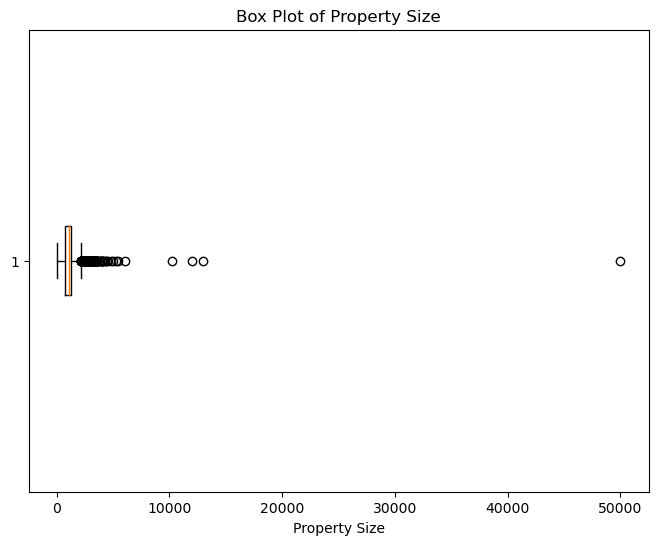

In [29]:
# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['property_size'], vert=False)
plt.title('Box Plot of Property Size')
plt.xlabel('Property Size')
plt.show()

In [31]:
# Remove the outliers
Q1 = df['property_size'].quantile(0.25)
Q3 = df['property_size'].quantile(0.75)
IQR = Q3 - Q1
#Identify and print outliers 
df = df[(df['property_size'] >= Q1 - 1.5 * IQR) & (df['property_size'] <= Q3 + 1.5 * IQR)]

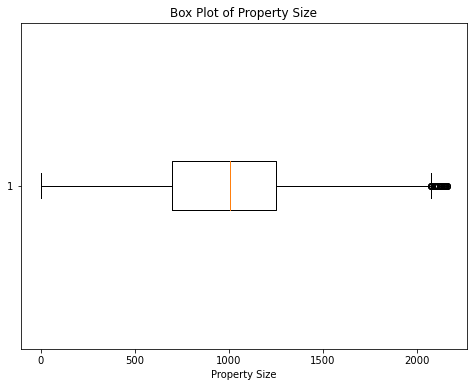

In [45]:
# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['property_size'], vert=False)
plt.title('Box Plot of Property Size')
plt.xlabel('Property Size')
plt.show()

In [46]:
df['bathroom'].value_counts()

2.0     11260
1.0      6253
3.0      2419
4.0       141
5.0         6
21.0        1
Name: bathroom, dtype: int64

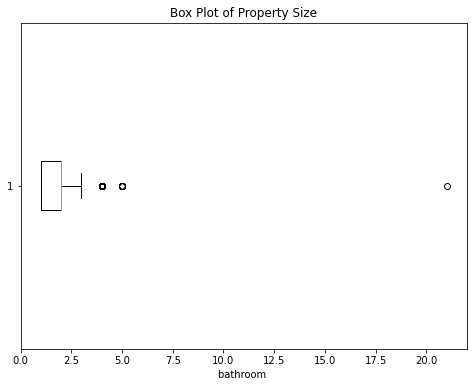

In [47]:
# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['bathroom'], vert=False)
plt.title('Box Plot of Property Size')
plt.xlabel('bathroom ')
plt.show()

In [32]:
df[['bathroom','rent']].groupby(['bathroom']).mean()

,rent
bathroom,
1.0,12136.380617
2.0,19879.533635
3.0,28840.201183
4.0,33140.000000
5.0,38666.666667
21.0,27000.000000


## Facing

In [37]:
df['facing'].value_counts()

E     9307
N     5781
W     2557
S     1189
NE     784
SE     188
NW     142
SW      56
Name: facing, dtype: int64

In [38]:
df[['facing','rent']].groupby(['facing']).mean()

,rent
facing,
E,18617.032771
N,17529.974918
NE,21048.783163
NW,21066.901408
S,18142.178301
SE,21283.202128
SW,24107.142857
W,20025.439578


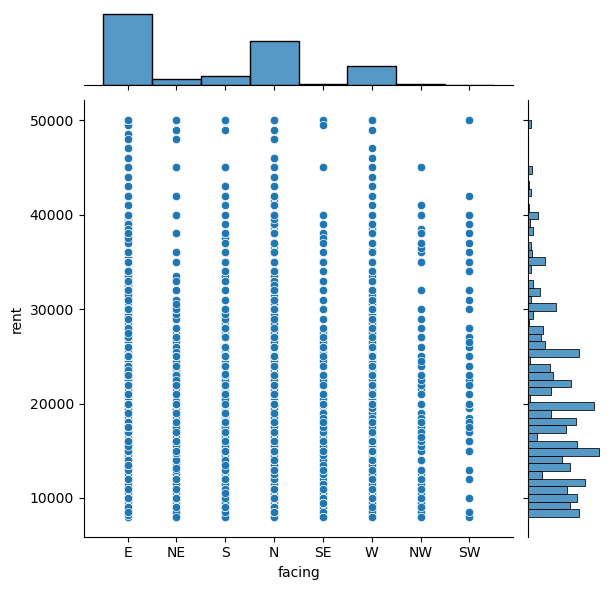

In [39]:
sns.jointplot(x = 'facing', y = 'rent', data = df)

In [40]:
label_encoder = LabelEncoder()
df['facing_encoded'] = label_encoder.fit_transform(df['facing'])
df.drop(columns=['facing'], inplace=True)

In [41]:
df['locality'].value_counts()[0:50]

Whitefield                       1025
HSR Layout                        657
Banashankari                      625
Marathahalli                      463
Mahadevapura                      425
BTM Layout                        422
JP Nagar                          422
RR Nagar                          408
Bellandur                         406
Koramangala                       357
Jayanagar                         353
Munnekollal                       322
BTM 2nd Stage                     313
Varthur                           297
Vijaya Nagar                      283
Kaggadasapura                     273
Basavanagudi                      247
Brookefield                       243
Rajaji Nagar                      238
Indiranagar                       227
Ejipura                           221
Nagarbhavi                        215
Kumaraswamy Layout                206
Bommanahalli                      202
Kasavanahalli                     198
Basaveshwar Nagar                 192
Uttarahalli 

In [42]:
df['floor'].value_counts()

1.0     5803
0.0     4748
2.0     4490
3.0     2550
4.0     1166
5.0      280
6.0      190
7.0      176
8.0      120
9.0      118
10.0      98
11.0      80
12.0      57
14.0      41
13.0      29
15.0      18
16.0      17
17.0       7
19.0       6
18.0       5
20.0       3
25.0       1
22.0       1
Name: floor, dtype: int64

<AxesSubplot:xlabel='floor', ylabel='Count'>

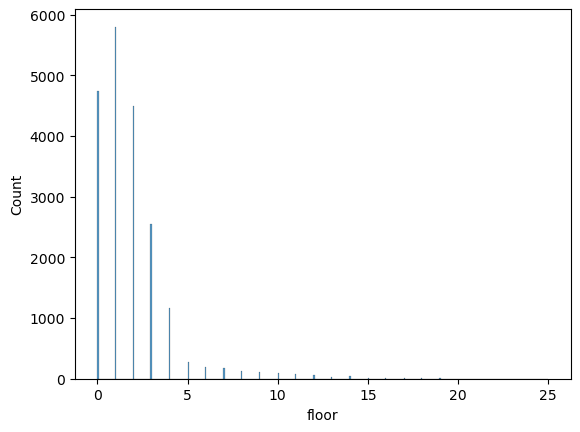

In [43]:
sns.histplot(data=df, x="floor")

In [44]:
df['total_floor'].value_counts()

4.0     4787
2.0     4734
3.0     4612
1.0     1980
5.0     1468
0.0      331
14.0     230
6.0      209
12.0     198
9.0      195
11.0     190
10.0     184
8.0      179
13.0     164
7.0      159
15.0     113
19.0      63
16.0      62
18.0      46
17.0      35
20.0      21
21.0      18
23.0       9
24.0       7
25.0       5
22.0       4
26.0       1
Name: total_floor, dtype: int64

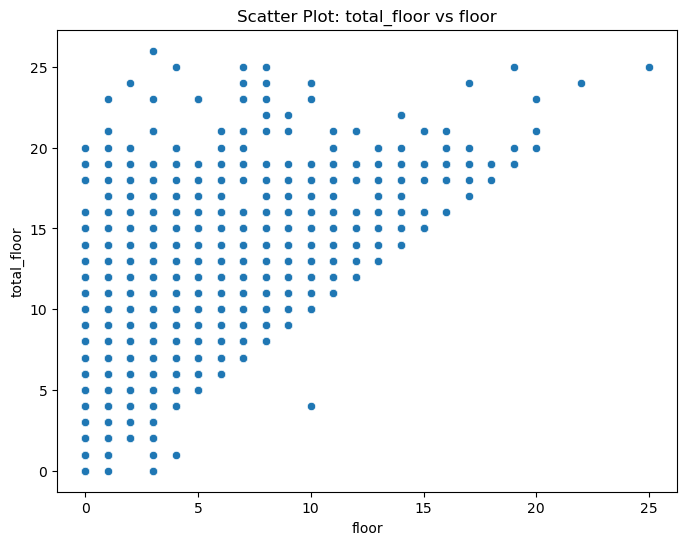

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['floor'], y=df['total_floor'])
plt.title("Scatter Plot: {} vs {}".format('total_floor', 'floor'))
plt.xlabel('floor')
plt.ylabel('total_floor')
plt.show()

In [46]:
df['balconies'].value_counts()

1.0     7883
0.0     5829
2.0     4519
3.0     1485
4.0      254
5.0       29
10.0       3
13.0       1
6.0        1
Name: balconies, dtype: int64

In [53]:
df.drop(columns = ['id', 'locality'], inplace=True)

In [48]:
df.shape

(20004, 33)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20004 entries, 0 to 20554
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   latitude               20004 non-null  float64
 1   longitude              20004 non-null  float64
 2   property_size          20004 non-null  float64
 3   bathroom               20004 non-null  float64
 4   floor                  20004 non-null  float64
 5   total_floor            20004 non-null  float64
 6   balconies              20004 non-null  float64
 7   rent                   20004 non-null  float64
 8   LIFT                   20004 non-null  int64  
 9   GYM                    20004 non-null  int64  
 10  AC                     20004 non-null  int64  
 11  CLUB                   20004 non-null  int64  
 12  INTERCOM               20004 non-null  int64  
 13  POOL                   20004 non-null  int64  
 14  CPA                    20004 non-null  int64  
 15  FS

In [51]:
df.describe()

,latitude,longitude,property_size,bathroom,floor,total_floor,balconies,rent,LIFT,GYM,...,PB,VP,age_of_property,lease_type_encoded,furnishing_encoded,parking_encoded,water_supply_encoded,building_type_encoded,BHK_type_encoded,facing_encoded
count,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,...,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000
mean,12.945857,77.637109,1017.974605,1.820036,1.867526,3.784393,1.129074,18607.808238,0.392172,0.240602,...,0.360428,0.233803,5.051840,1.521346,1.815987,1.252150,1.370276,1.242851,1.143171,1.584983
std,0.029555,0.111176,393.759395,0.666513,2.149827,3.117595,0.977596,7932.959840,0.488247,0.427460,...,0.480137,0.423259,0.473422,1.478569,0.513267,1.394638,0.731121,1.127085,0.909766,2.355397
min,12.900004,77.500072,1.000000,1.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,0.000000,...,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.918498,77.572156,700.000000,1.000000,1.000000,2.000000,0.000000,12000.000000,0.000000,0.000000,...,0.000000,0.000000,5.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,12.944050,77.633149,1000.000000,2.000000,1.000000,3.000000,1.000000,17000.000000,0.000000,0.000000,...,0.000000,0.000000,5.000000,1.000000,2.000000,0.000000,2.000000,2.000000,1.000000,1.000000
75%,12.970992,77.695549,1250.000000,2.000000,2.000000,4.000000,2.000000,23000.000000,1.000000,0.000000,...,1.000000,0.000000,5.000000,3.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000
max,12.999999,80.266346,2075.000000,21.000000,25.000000,26.000000,13.000000,50000.000000,1.000000,1.000000,...,1.000000,1.000000,6.000000,3.000000,2.000000,3.000000,2.000000,3.000000,5.000000,7.000000


In [52]:
df.isnull().sum()

latitude                 0
longitude                0
property_size            0
bathroom                 0
floor                    0
total_floor              0
balconies                0
rent                     0
LIFT                     0
GYM                      0
AC                       0
CLUB                     0
INTERCOM                 0
POOL                     0
CPA                      0
FS                       0
SERVANT                  0
SECURITY                 0
GP                       0
PARK                     0
RWH                      0
STP                      0
HK                       0
PB                       0
VP                       0
age_of_property          0
lease_type_encoded       0
furnishing_encoded       0
parking_encoded          0
water_supply_encoded     0
building_type_encoded    0
BHK_type_encoded         0
facing_encoded           0
dtype: int64

# Model Building

In [92]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Create feature (X) and target (y) arrays
X = df.drop(columns=['rent'])
y = df['rent']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
#from tensorflow import keras
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.optimizers import Adam
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor

# Load your dataset

# Preprocessing
# Handle missing values, encode categorical variables, etc.

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['rent'])
y = df['rent']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression (L2)
lin_reg = Ridge(alpha=1.0)
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin_reg = lin_reg.predict(X_test_scaled)

# Linear Regression (L1)
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)
y_pred_lasso_reg = lasso_reg.predict(X_test_scaled)

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly_reg = poly_reg.predict(X_test_poly)

# Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)
y_pred_rf_reg = rf_reg.predict(X_test_scaled)

# XGBoost
xgb_reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_reg.fit(X_train_scaled, y_train)
y_pred_xgb_reg = xgb_reg.predict(X_test_scaled)

# Artificial Neural Networks (ANN)
# ann_model = Sequential()
# ann_model.add(Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1]))
# ann_model.add(Dense(units=64, activation='relu'))
# ann_model.add(Dense(units=1))
# ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
# ann_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
# y_pred_ann = ann_model.predict(X_test_scaled)

# Support Vector Machines (SVM)
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train_scaled, y_train)
y_pred_svm_reg = svm_reg.predict(X_test_scaled)

# Ensemble Learning (Voting Regressor)
ensemble_model = VotingRegressor(estimators=[
    ('lin_reg', lin_reg),
    ('lasso_reg', lasso_reg),
    ('rf_reg', rf_reg),
    ('xgb_reg', xgb_reg),
    ('svm_reg', svm_reg)
])
ensemble_model.fit(X_train_scaled, y_train)
y_pred_ensemble = ensemble_model.predict(X_test_scaled)

# Evaluate Models
print("Linear Regression (L2) - RMSE:", mean_squared_error(y_test, y_pred_lin_reg, squared=False))
print("Linear Regression (L1) - RMSE:", mean_squared_error(y_test, y_pred_lasso_reg, squared=False))
print("Polynomial Regression - RMSE:", mean_squared_error(y_test, y_pred_poly_reg, squared=False))
print("Random Forest - RMSE:", mean_squared_error(y_test, y_pred_rf_reg, squared=False))
print("XGBoost - RMSE:", mean_squared_error(y_test, y_pred_xgb_reg, squared=False))
#print("Artificial Neural Networks - RMSE:", mean_squared_error(y_test, y_pred_ann, squared=False))
print("Support Vector Machines - RMSE:", mean_squared_error(y_test, y_pred_svm_reg, squared=False))
print("Ensemble Learning (Voting Regressor) - RMSE:", mean_squared_error(y_test, y_pred_ensemble, squared=False))



Linear Regression (L2) - RMSE: 4818.4966489264225
Linear Regression (L1) - RMSE: 4818.474122303057
Polynomial Regression - RMSE: 5147.497027296091
Random Forest - RMSE: 3551.325341214774
XGBoost - RMSE: 3404.19070839945
Support Vector Machines - RMSE: 5093.361996700601
Ensemble Learning (Voting Regressor) - RMSE: 4042.1639219239487


In [64]:
r2_score(y_test, y_pred_rf_reg)

0.8058015154960168

In [66]:
from sklearn.model_selection import GridSearchCV
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform GridSearchCV for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train_scaled, y_train)
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)

# Perform GridSearchCV for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
grid_search_xgb = GridSearchCV(xgb.XGBRegressor(random_state=42), param_grid_xgb, cv=5, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train_scaled, y_train)
best_xgb = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test_scaled)

# Other models as before
# ...

# Evaluate Models
print("Best Random Forest - RMSE:", mean_squared_error(y_test, y_pred_best_rf, squared=False))
print("Best XGBoost - RMSE:", mean_squared_error(y_test, y_pred_best_xgb, squared=False))
# ...

KeyboardInterrupt: 